In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/Users/fred0522/Desktop/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
y_mapping={'no':0,'yes':1}
job_mapping={ 'admin.':0,'blue-collar':1,'entrepreneur':2,'housemaid':3,'management':4,'retired':5,'self-employed':6,'services':7,'student':8,'technician':9,'unemployed':10,'unknown':11}
marital_mapping={'divorced':0,'married':1,'single':2,'unknown':3}
education_mapping={'primary':0,'secondary':1,'tertiary':2,'unknown':3}
default_mapping={'no':0,'yes':1,"unknown":2}
housing_mapping={'no':0,'yes':1,"unknown":2}
loan_mapping={'no':0,'yes':1,"unknown":2}
contact_mapping={'cellular':0,'telephone':1,"unknown":2}
month_mapping={'jan':0,'feb':1,'mar':2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11}
poutcome_mapping={ 'failure':0,'other':1,'success':2,"unknown":3}

df['y']=df['y'].map(y_mapping)
df['job']=df['job'].map(job_mapping)
df['marital']=df['marital'].map(marital_mapping)
df['education']=df['education'].map(education_mapping)
df['default']=df['default'].map(default_mapping)
df['housing']=df['housing'].map(housing_mapping)
df['loan']=df['loan'].map(loan_mapping)
df['contact']=df['contact'].map(contact_mapping)
df['month']=df['month'].map(month_mapping)
df['poutcome']=df['poutcome'].map(poutcome_mapping)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,4,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,4,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,4,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,4,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,4,198,1,-1,0,3,0


In [4]:
print(df['y'].unique())
print(df['job'].unique())
print(df['marital'].unique())
print(df['education'].unique())
print(df['default'].unique())
print(df['housing'].unique())
print(df['loan'].unique())
print(df['contact'].unique())
print(df['month'].unique())
print(df['poutcome'].unique())

[0 1]
[ 4  9  2  1 11  5  0  7  6 10  3  8]
[1 2 0]
[2 1 3 0]
[0 1]
[1 0]
[0 1]
[2 0 1]
[ 4  5  6  7  9 10 11  0  1  2  3  8]
[3 0 1 2]


In [5]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [6]:
#將y屬性抓出作為預測欄位
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('y',axis=1))
scaled_features = scaler.transform(df.drop('y',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,-0.475354,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,-0.475354,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,-0.475354,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,-0.475354,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,-0.475354,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


In [7]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
X = df_feat
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [8]:
#使用KNN演算法,從k=1開始測試
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [9]:
#測試KNN演算法的好壞
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[11254   714]
 [  960   636]]


In [10]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11968
           1       0.47      0.40      0.43      1596

    accuracy                           0.88     13564
   macro avg       0.70      0.67      0.68     13564
weighted avg       0.87      0.88      0.87     13564



In [11]:
#k=1測試結果
knnModel = KNeighborsClassifier(n_neighbors=1)
knnModel.fit(X_train,y_train)
predicted = knnModel.predict(X_train)
print('Training Set:',knnModel.score(X_train,y_train))
print('Test Set:',knnModel.score(X_test,y_test))

Training Set: 1.0
Test Set: 0.8765850781480389


In [12]:
#k=2測試結果
knnModel = KNeighborsClassifier(n_neighbors=2)
knnModel.fit(X_train,y_train)
predicted = knnModel.predict(X_train)
print('Training Set:',knnModel.score(X_train,y_train))
print('Test Set:',knnModel.score(X_test,y_test))

Training Set: 0.9305463393054634
Test Set: 0.8885284576820996


In [13]:
#利用for迴圈，選擇k值(1~35)
error_rate = []
for i in range(1,35):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

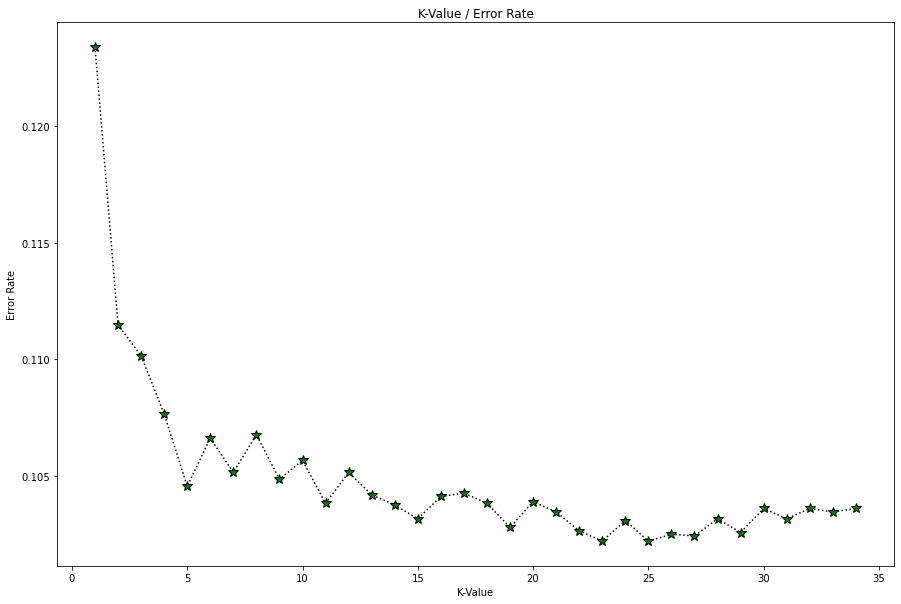

In [14]:
#將k=1~35的錯誤率製圖畫出。k=17之後，錯誤率約在0.105之間震盪。
plt.figure(figsize=(15,10))
plt.plot(range(1,35),error_rate,color='black',linestyle='dotted',marker='*',markerfacecolor='green',markersize=10)
plt.title('K-Value / Error Rate')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

In [15]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,pred)
print("MAE: ",mae)

MAE:  0.12341492185196107


In [16]:
import math
MSE = np.square(np.subtract(y_test,pred)).mean() 
RMSE = math.sqrt(MSE)
print("RMSE: ",RMSE)

RMSE:  0.3513045998161155


In [17]:
mape = mean_absolute_error(y_test,pred)*100
print("MAPE: ",mape)

MAPE:  12.341492185196106
